# ETL Datasets Final

## Extracción

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
file_name_inflac = "/content/drive/MyDrive/Colab Notebooks/Proyecto AprendAutom/Inflacion (ipcn)-Preprocesado.xlsx"
df_inflac = pd.read_excel(file_name_inflac)

# eliminar la ultima fila
df_inflac = df_inflac.iloc[:-1]
df_inflac.dtypes


,0
Año,int64
Mes,int64
Indice general,float64


In [29]:
file_name_Producc = "/content/drive/MyDrive/Colab Notebooks/Proyecto AprendAutom/Produccion_Industrial-Preprocesado.xlsx"
df_prod = pd.read_excel(file_name_Producc)
df_prod.head()

,Año,Mes,Total,Aireacondicionado,Celulares,Microondas,Televisor,Mod Electr Autom
0,2013,Ene,1260521,77671,609990,38094,136796,23797
1,2013,Feb,1559546,90403,703500,32936,207715,26602
2,2013,Mar,1935759,115115,918733,62302,288394,36371
3,2013,Apr,2072806,78426,1083534,46865,268295,39229
4,2013,May,2538083,108772,1293334,63549,320475,48379


In [30]:
file_name_Dolar = "/content/drive/MyDrive/Colab Notebooks/Proyecto AprendAutom/cotizacion_dolar-Preprocesado.xlsx"
df_dolar = pd.read_excel(file_name_Dolar)
df_dolar.rename(columns={'Año': 'AÑO'}, inplace=True)
df_dolar
#eliminar las ultimas 2 filas
df_dolar = df_dolar.iloc[:-2]
df_dolar.dtypes


,0
AÑO,int64
Mes,object
Num_Mes,int64
Cotizacion,float64


In [31]:
file_name_mundial = "/content/drive/MyDrive/Colab Notebooks/Proyecto AprendAutom/mundiales.xlsx"
df_mundial = pd.read_excel(file_name_mundial)
#df_dolar.rename(columns={'Año': 'AÑO'}, inplace=True)
df_mundial
#eliminar las ultimas 2 filas
df_mundial = df_mundial.iloc[:-9]
df_mundial.dtypes
df_mundial

,Año,Mes,Mundial
0,2014,1,0
1,2014,2,0
2,2014,3,0
3,2014,4,0
4,2014,5,0
...,...,...,...
130,2024,11,0
131,2024,12,0
132,2025,1,0
133,2025,2,0


## Transformación
A partir de los datasets preprocesados, se conformará un único dataset final

In [32]:
df_concat=pd.concat([df_inflac,df_prod,df_dolar], axis=1)
df_concat

,Año,Mes,Indice general,Año,Mes,Total,Aireacondicionado,Celulares,Microondas,Televisor,Mod Electr Autom,AÑO,Mes,Num_Mes,Cotizacion
0,2013,1,1.02,2013,Ene,1260521,77671,609990,38094,136796,23797,2013,ENE,1,4.96
1,2013,2,1.06,2013,Feb,1559546,90403,703500,32936,207715,26602,2013,FEB,2,5.02
2,2013,3,1.01,2013,Mar,1935759,115115,918733,62302,288394,36371,2013,MAR,3,5.10
3,2013,4,0.96,2013,Apr,2072806,78426,1083534,46865,268295,39229,2013,ABR,4,5.16
4,2013,5,1.26,2013,May,2538083,108772,1293334,63549,320475,48379,2013,MAY,5,5.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2024,11,2.43,2024,Nov*,1260593,198554,716903,18428,247424,37837,2024,NOV,11,991.00
143,2024,12,2.70,2024,Dic*,1099022,216260,633913,17519,189205,17606,2024,DIC,12,1012.50
144,2025,1,2.21,2025,Ene*,773676,102142,393358,16859,196924,28338,2025,ENE,1,1033.50
145,2025,2,2.40,2025,Feb*,935562,67686,557773,1140,230022,40067,2025,FEB,2,1044.25


In [33]:
# mostrar nombre de columnas
df_concat.columns

Index(['Año', 'Mes', 'Indice general', 'Año', 'Mes', 'Total',
       'Aireacondicionado', 'Celulares', 'Microondas', 'Televisor',
       'Mod Electr Autom', 'AÑO', 'Mes', 'Num_Mes', 'Cotizacion'],
      dtype='object')

In [34]:
# Dataset final
df_final=df_concat.loc[:,['AÑO', 'Num_Mes', 'Indice general',  'Cotizacion',
       'Aireacondicionado', 'Celulares', 'Microondas', 'Televisor',
       'Mod Electr Autom']]
df_final

,AÑO,Num_Mes,Indice general,Cotizacion,Aireacondicionado,Celulares,Microondas,Televisor,Mod Electr Autom
0,2013,1,1.02,4.96,77671,609990,38094,136796,23797
1,2013,2,1.06,5.02,90403,703500,32936,207715,26602
2,2013,3,1.01,5.10,115115,918733,62302,288394,36371
3,2013,4,0.96,5.16,78426,1083534,46865,268295,39229
4,2013,5,1.26,5.26,108772,1293334,63549,320475,48379
...,...,...,...,...,...,...,...,...,...
142,2024,11,2.43,991.00,198554,716903,18428,247424,37837
143,2024,12,2.70,1012.50,216260,633913,17519,189205,17606
144,2025,1,2.21,1033.50,102142,393358,16859,196924,28338
145,2025,2,2.40,1044.25,67686,557773,1140,230022,40067


In [35]:
df_final.dtypes

,0
AÑO,int64
Num_Mes,int64
Indice general,float64
Cotizacion,float64
Aireacondicionado,int64
Celulares,int64
Microondas,int64
Televisor,int64
Mod Electr Autom,int64


In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AÑO                147 non-null    int64  
 1   Num_Mes            147 non-null    int64  
 2   Indice general     147 non-null    float64
 3   Cotizacion         147 non-null    float64
 4   Aireacondicionado  147 non-null    int64  
 5   Celulares          147 non-null    int64  
 6   Microondas         147 non-null    int64  
 7   Televisor          147 non-null    int64  
 8   Mod Electr Autom   147 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 10.5 KB


In [37]:
# Análisis descriptivo
print(df_final.describe())


               AÑO     Num_Mes  Indice general   Cotizacion  \
count   147.000000  147.000000      147.000000   147.000000   
mean   2018.632653    6.408163        3.701293   155.637075   
std       3.550191    3.489230        3.455091   280.347935   
min    2013.000000    1.000000        0.200000     4.960000   
25%    2016.000000    3.000000        1.505000    13.690000   
50%    2019.000000    6.000000        2.740000    40.300000   
75%    2022.000000    9.000000        4.415000   108.250000   
max    2025.000000   12.000000       25.470000  1053.500000   

       Aireacondicionado     Celulares    Microondas      Televisor  \
count         147.000000  1.470000e+02    147.000000     147.000000   
mean       105920.585034  7.831283e+05  32867.789116  229587.537415   
std         57860.634565  3.137234e+05  17634.822394   93860.625887   
min             0.000000  0.000000e+00      0.000000       0.000000   
25%         64228.500000  5.710850e+05  20262.000000  170605.000000   
50%   

## Análisis de Variables

Aire Acondicionado

Los datos muestran que las ventas de aire acondicionado tienen una media de aproximadamente 105 unidades. El rango de ventas varía desde 0 hasta 268.344, lo que indica una considerable variabilidad en la demanda. La alta desviación estándar de 57.860 sugiere que las ventas pueden estar influenciadas por factores estacionales, como el clima, que afectan la necesidad de refrigeración. Este producto parece tener un mercado robusto, aunque también presenta casos de baja venta, lo que podría señalar un comportamiento de compra sensible a factores externos.

Celulares

Las ventas de celulares son notablemente altas, con una media de 783,128 unidades vendidas. El rango abarca desde 0 hasta 1,629,422, lo que indica una demanda muy variable y sugiere que hay un segmento significativo del mercado que está muy activo. La desviación estándar de 313.723 refuerza esta idea, mostrando que algunas marcas o modelos pueden estar dominando las ventas en ciertos períodos, mientras que otros pueden estar rezagados. Esto refleja la competitividad del mercado de teléfonos móviles, donde la innovación y las tendencias juegan un papel crucial.

Microondas

Las ventas de microondas presentan una media de 32.867 unidades, con un rango entre 0 y 83.322. Aunque este número es significativamente menor en comparación con otros productos, la estabilidad de la media sugiere que los microondas son un artículo esencial en muchos hogares. La desviación estándar de 17.634 indica que, aunque las ventas son más constantes, todavía hay variaciones, posiblemente influenciadas por promociones o cambios en la demanda de nuevos modelos.

Televisores

Con una media de 229.588 unidades vendidas, los televisores muestran un mercado saludable. Las ventas oscilan entre 0 y 548.497, lo que sugiere que hay un interés constante en la compra de televisores, especialmente durante eventos importantes como lanzamientos de nuevos modelos o temporadas de ofertas. La desviación estándar de 93.861 indica que, si bien hay un volumen considerable de ventas, también existen picos que podrían estar relacionados con tendencias de entretenimiento y cambios en la tecnología de visualización.

Mod Electr Autom

Las ventas de productos de "Mod Electr Autom" presentan una media de 15.005 unidades, con un rango de 0 a 55.379. Este número relativamente bajo en comparación con otros productos puede indicar que se trata de un nicho más pequeño dentro del mercado. La desviación estándar de 12.314 sugiere que, aunque hay algunas variaciones en las ventas, el interés general en este tipo de productos es moderado. Esto podría reflejar la especialización del mercado, donde las decisiones de compra son más selectivas y menos frecuentes.

In [38]:
# Correlación entre variables
correlation_matrix = df_final.corr()
print(correlation_matrix)

                        AÑO   Num_Mes  Indice general  Cotizacion  \
AÑO                1.000000 -0.047529        0.566261    0.700371   
Num_Mes           -0.047529  1.000000       -0.029105   -0.014546   
Indice general     0.566261 -0.029105        1.000000    0.436936   
Cotizacion         0.700371 -0.014546        0.436936    1.000000   
Aireacondicionado -0.157011  0.701434       -0.098331   -0.025857   
Celulares         -0.416314  0.164040       -0.261291   -0.362638   
Microondas        -0.317641  0.193898       -0.168281   -0.329466   
Televisor         -0.242560  0.145156       -0.270199   -0.207966   
Mod Electr Autom  -0.345523  0.061731       -0.142465    0.240642   

                   Aireacondicionado  Celulares  Microondas  Televisor  \
AÑO                        -0.157011  -0.416314   -0.317641  -0.242560   
Num_Mes                     0.701434   0.164040    0.193898   0.145156   
Indice general             -0.098331  -0.261291   -0.168281  -0.270199   
Cotizacion   

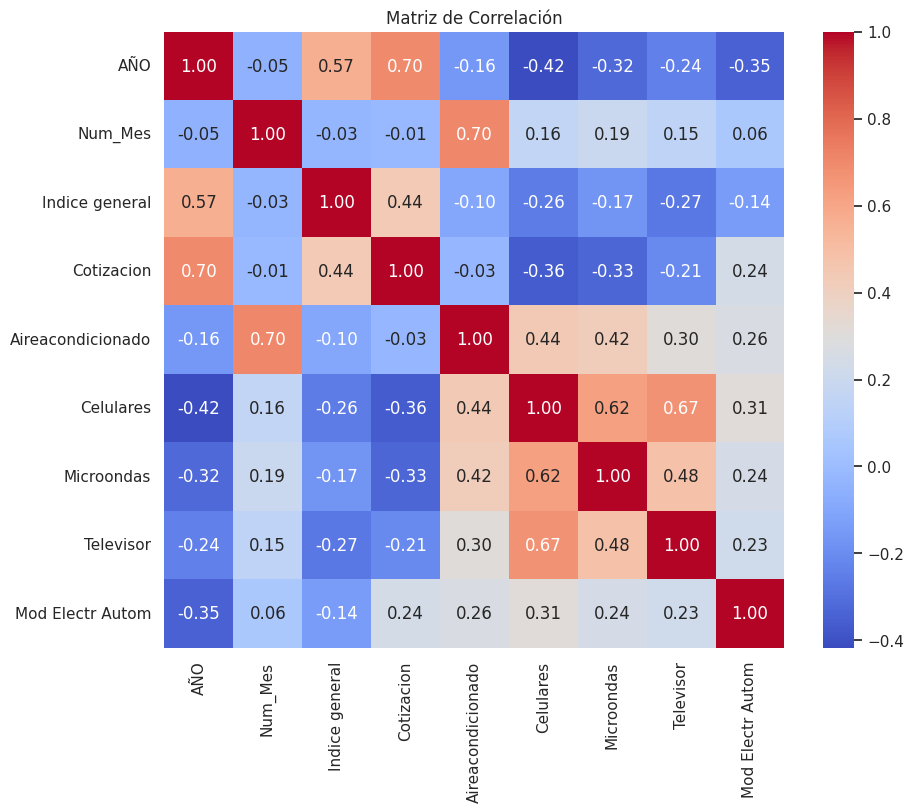

In [39]:
# grafico de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


Este gráfico de correlaciones nos demuestra la necesidad de contar con mas variables explicativas para el armado de los modelos.


# Visualización

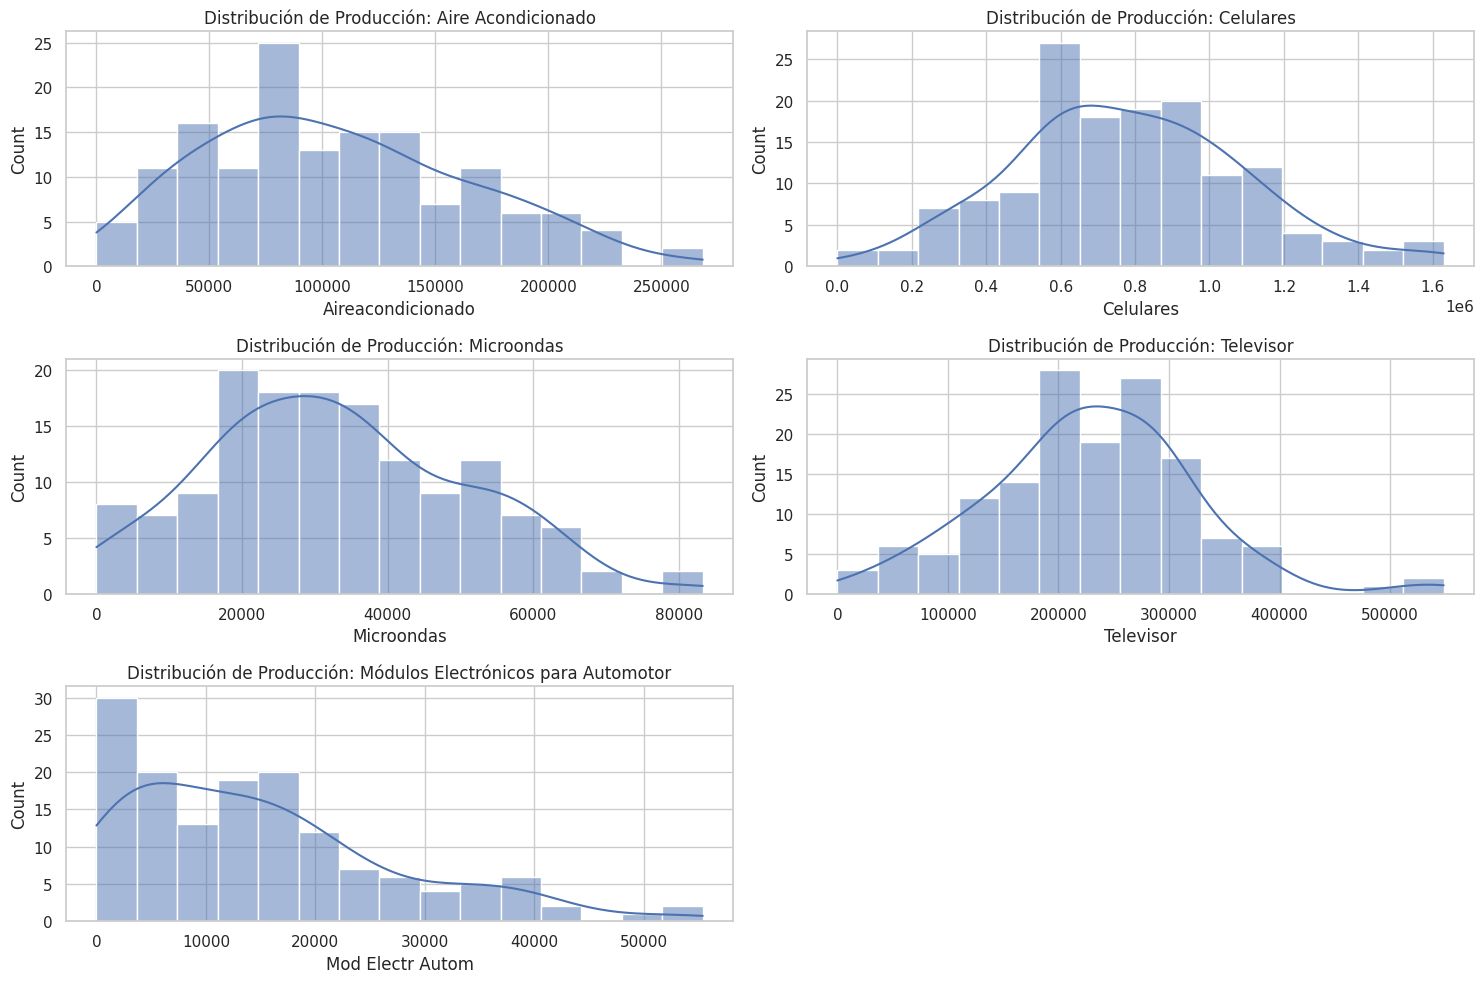

In [40]:
sns.set(style="whitegrid")

# Histogramas de Producción por Producto
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.histplot(df_final['Aireacondicionado'], bins=15, kde=True)
plt.title('Distribución de Producción: Aire Acondicionado')

plt.subplot(3, 2, 2)
sns.histplot(df_final['Celulares'], bins=15, kde=True)
plt.title('Distribución de Producción: Celulares')

plt.subplot(3, 2, 3)
sns.histplot(df_final['Microondas'], bins=15, kde=True)
plt.title('Distribución de Producción: Microondas')

plt.subplot(3, 2, 4)
sns.histplot(df_final['Televisor'], bins=15, kde=True)
plt.title('Distribución de Producción: Televisor')

plt.subplot(3, 2, 5)
sns.histplot(df_final['Mod Electr Autom'], bins=15, kde=True)
plt.title('Distribución de Producción: Módulos Electrónicos para Automotor')

plt.tight_layout()
plt.show()

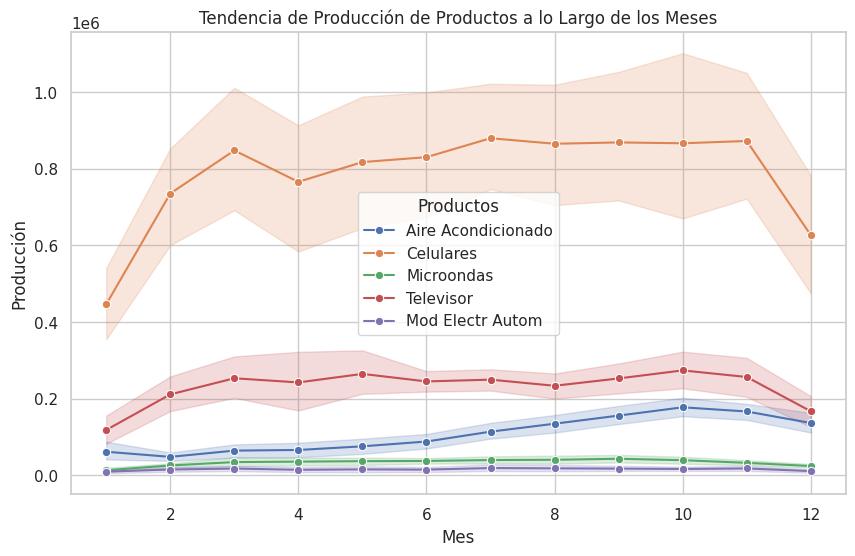

In [41]:
# Gráfico de Líneas de Producción a lo Largo del Tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_final, x='Num_Mes', y='Aireacondicionado', label='Aire Acondicionado', marker='o')
sns.lineplot(data=df_final, x='Num_Mes', y='Celulares', label='Celulares', marker='o')
sns.lineplot(data=df_final, x='Num_Mes', y='Microondas', label='Microondas', marker='o')
sns.lineplot(data=df_final, x='Num_Mes', y='Televisor', label='Televisor', marker='o')
sns.lineplot(data=df_final, x='Num_Mes', y='Mod Electr Autom', label='Mod Electr Autom', marker='o')
plt.title('Tendencia de Producción de Productos a lo Largo de los Meses')
plt.xlabel('Mes')
plt.ylabel('Producción')
plt.legend(title='Productos')
plt.show()


La visualización muestra la tendencia de producción de varios productos a lo largo de los meses, revelando patrones importantes en la demanda del mercado.

En primer lugar, las ventas de aire acondicionado son notablemente estables y altas a lo largo del año. Esto sugiere una demanda constante, posiblemente influenciada por factores estacionales, como el clima cálido. La necesidad de refrigeración durante los meses más calurosos puede mantener un interés sostenido en este producto.

Por otro lado, los celulares presentan un crecimiento significativo y una alta producción. Esta tendencia dinámica indica un mercado activo, con lanzamientos frecuentes y una fuerte demanda por parte de los consumidores. La competitividad en el sector de la telefonía móvil parece impulsar un aumento constante en las ventas.

En contraste, las ventas de microondas muestran una producción más baja, pero relativamente estable. Este comportamiento puede reflejar una demanda constante que no fluctúa tanto con las tendencias estacionales, lo que sugiere que los microondas son considerados un artículo esencial en muchos hogares.

Las televisores, por su parte, muestran cierta variabilidad en la producción. Esto puede indicar que las ventas son susceptibles a picos durante eventos específicos, como promociones de ventas o el lanzamiento de nuevos modelos, lo que afecta el interés del consumidor.

Finalmente, los productos de Mod Electr Autom tienen la menor producción en comparación con los demás. Esto podría sugerir que este mercado es más especializado o que enfrenta una menor demanda general, lo que podría requerir estrategias de marketing más enfocadas para aumentar su atractivo.

## Carga

In [42]:
# Guardar en excel
df_final.to_excel('Dataset Final.xlsx', index=False)